In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#downloading 1 year historical data
df_tesla_closing_prices = yf.download('TSLA','2022-04-19','2023-04-19')
df_apple_closing_prices = yf.download('AAPL','2022-04-19','2023-04-19')
df_microsoft_closing_prices = yf.download('MSFT','2022-04-19','2023-04-19')
df_netflix_closing_prices = yf.download('NFLX','2022-04-19','2023-04-19')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
#data summary to check for any Null or NaN values
df_tesla_closing_prices.info()
'''df_apple_closing_prices.info()
df_microsoft_closing_prices.info()
df_netflix_closing_prices.info()'''

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-04-19 to 2023-04-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


'df_apple_closing_prices.info()\ndf_microsoft_closing_prices.info()\ndf_netflix_closing_prices.info()'

In [4]:
#function to calculate daily returns takes 2 args, historical data dataframe and number of shares
def calculate_daily_returns(closing_prices_df, no_of_shares):
    closing_prices_df['Adj Close prev'] = 0 
    closing_prices_df.iloc[1:len(closing_prices_df.index), 6] = closing_prices_df.iloc[0:len(closing_prices_df.index)-1, 4]
    closing_prices_df['Returns'] = closing_prices_df['Adj Close'] - closing_prices_df['Adj Close prev'] 
    closing_prices_df.iloc[0, 7] = 0 
    closing_prices_df['Returns '+str(no_of_shares)+'L'] = no_of_shares * closing_prices_df['Returns'] 
    
#function to calculate weekly returns takes 2 args, historical data dataframe and number of shares
def calculate_weekly_returns(closing_prices_df, no_of_shares):
    #closing_prices_df['Weekday'] = closing_prices_df.index.weekday
    closing_prices_df['WeekNumber'] = closing_prices_df.index.isocalendar().week
    closing_prices_df['year'] = closing_prices_df.index.isocalendar().year
    return closing_prices_df.groupby(['year','WeekNumber'])['Returns '+str(no_of_shares)+'L'].sum()

In [5]:
#function call to calculate daily returns
calculate_daily_returns(df_tesla_closing_prices, 500)
calculate_daily_returns(df_apple_closing_prices, 100)
calculate_daily_returns(df_microsoft_closing_prices, -100)
calculate_daily_returns(df_netflix_closing_prices, -50)

#calculate total daily returns for each stock
TeslaTotalReturn = df_tesla_closing_prices['Returns 500L'].sum()
AppleTotalReturn = df_apple_closing_prices['Returns 100L'].sum()
MicrosoftTotalReturn = df_microsoft_closing_prices['Returns -100L'].sum()
NetflixTotalReturn = df_netflix_closing_prices['Returns -50L'].sum()

#Net Return calculated for plotting a graph
NetReturnPlot = df_tesla_closing_prices['Returns 500L'] + df_apple_closing_prices['Returns 100L'] + df_microsoft_closing_prices['Returns -100L'] + df_netflix_closing_prices['Returns -50L']
NetReturnPlot.sort_values(inplace = True)
print(type(NetReturnPlot))

#Net Retrun calculated to Print
NetReturn = TeslaTotalReturn + AppleTotalReturn + MicrosoftTotalReturn + NetflixTotalReturn

print("Net Return:", NetReturn)

<class 'pandas.core.series.Series'>
Net Return: -79034.21173095703


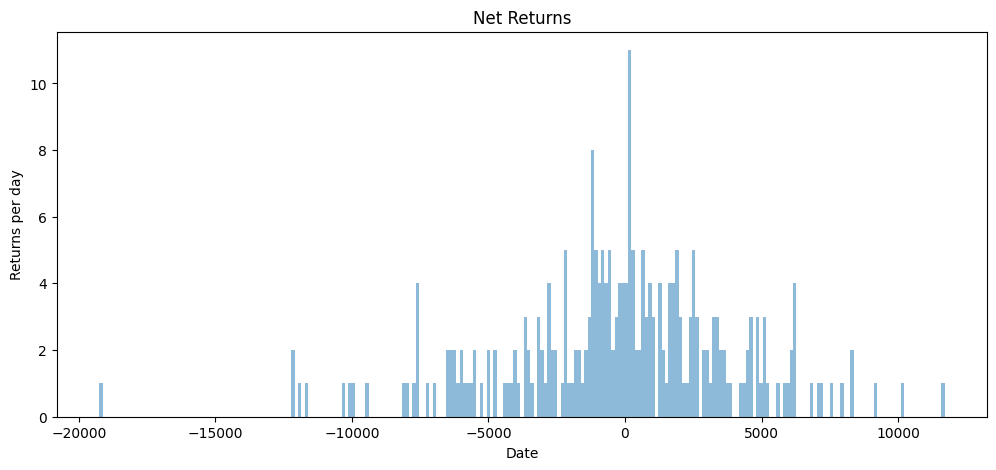

In [6]:
#Net Daily returns
fig = plt.figure(figsize = (12, 5))
#plot.hist(df_tesla_closing_prices.index, NetReturnPlot, width = 1.5)
NetReturnPlot.plot.hist(bins=251, alpha=0.5)
plt.title('Net Returns')
plt.xlabel('Date')
plt.ylabel('Returns per day')
plt.show(block=True)

In [7]:
#function call to calculate weekly returns for each stock and converting it to a dataframe
df_tesla_weekly_returns = calculate_weekly_returns(df_tesla_closing_prices, 500).to_frame()
df_apple_weekly_returns = calculate_weekly_returns(df_apple_closing_prices, 100).to_frame()
df_microsoft_weekly_returns = calculate_weekly_returns(df_microsoft_closing_prices, -100).to_frame()
df_netflix_weekly_returns = calculate_weekly_returns(df_netflix_closing_prices, -50).to_frame()

#calculate total weekly returns for each stock
TeslaTotalWeeklyReturn = df_tesla_weekly_returns['Returns 500L'].sum()
AppleTotalWeeklyReturn = df_apple_weekly_returns['Returns 100L'].sum()
MicrosoftTotalWeeklyReturn = df_microsoft_weekly_returns['Returns -100L'].sum()
NetflixTotalWeeklyReturn = df_netflix_weekly_returns['Returns -50L'].sum()

#Net Weekly Return calculated for plotting a graph
NetWeeklyReturnPlot = df_tesla_weekly_returns['Returns 500L'] + df_apple_weekly_returns['Returns 100L'] + df_microsoft_weekly_returns['Returns -100L'] + df_netflix_weekly_returns['Returns -50L']

#Net Weekly Retrun calculated to Print
NetWeeklyReturn = TeslaTotalWeeklyReturn + AppleTotalWeeklyReturn + MicrosoftTotalWeeklyReturn + NetflixTotalWeeklyReturn

print("Net Weekly Return:", NetWeeklyReturn)

Net Weekly Return: -79034.21173095703


In [8]:
#calculate_weekdays(df_tesla_closing_prices)
#df_tesla_weekly_returns = calculate_weekly_returns(df_tesla_closing_prices).to_frame()
#df_tesla_weekly_returns.head()
#df_tesla_weekly_returns.plot(kind = "bar", figsize=(12, 5), title = "Weekly returns Tesla")

<Axes: title={'center': 'Net Weekly Returns'}, xlabel='year,WeekNumber'>

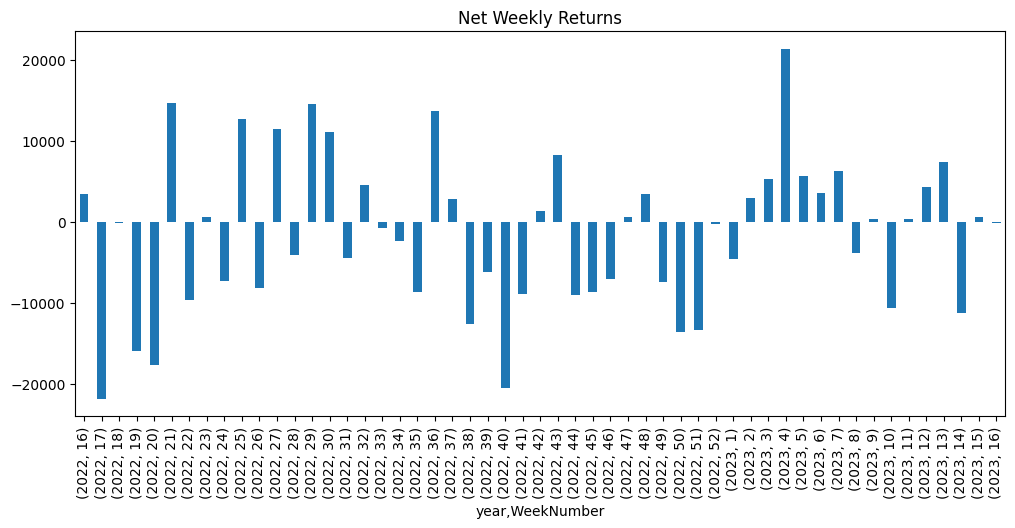

In [9]:
NetWeeklyReturnPlot.plot(kind = "bar", figsize=(12, 5), title = "Net Weekly Returns")